Calculation Time: 17.7 seconds
pi: 3.1737
3.0655<pi<3.2878 (95%)


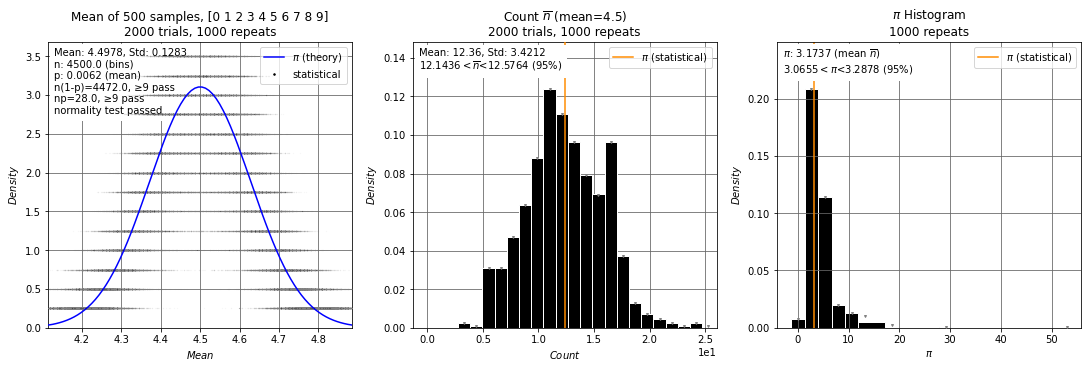

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
from datetime import datetime

%matplotlib inline

# returns the elapsed milliseconds since the start of the program
def timesec(start_time):
   dt = datetime.now() - start_time
   ms = (dt.days * 24 * 60 * 60 + dt.seconds)  + dt.microseconds /1000000
   return ms

start_time = datetime.now()

fig= plt1.figure(figsize=(15, 5), constrained_layout=True)
widths = [5,5,5]
heights = [5]
gs=fig.add_gridspec(1,3,width_ratios=widths, height_ratios=heights, wspace=0.05)

ax1a=fig.add_subplot(gs[0,:1])
ax1b=fig.add_subplot(gs[0,1:2])
ax1c=fig.add_subplot(gs[0,2:])

ax1a.clear()
ax1b.clear()
ax1c.clear()

#---------------------------------------Main Code---------------------------------------
#Samples, trials (pick trials >1000 to avoid zero counts) and repeats
samples=500
trials=2000
repeats=1000

#Set arrays to zero
piarray=np.zeros(repeats)
narray=np.zeros(repeats)
stdarray=np.zeros(repeats)
countarray=np.zeros(repeats)

#Sample array and expected value
sa=np.array([0,1,2,3,4,5,6,7,8,9])
#sa=np.array([0,1])
ev=(np.max(sa)-np.min(sa))/2

#Detemermine: Stdev, And dx
var=((np.max(sa)-np.min(sa)+1)**2-1)/12
stdev=np.sqrt(var)
stdevt=stdev/np.sqrt(samples)
dx=1/samples

for p in range(repeats):

    #Create Array random numbers
    random=np.random.choice(sa,[trials,samples])

    #Determine mean from random no of numbers (of samples)
    m=np.mean(random,axis=1)
    mn=np.mean(m)

    #Create dataframe and count number of observation per interval
    df=pd.DataFrame({'m' : m})
    dfg=df.groupby(['m'])['m'].agg(['count']).reset_index()

    #Histogram x=bins and y is density
    x=dfg['m'].to_numpy()
    yt=dfg['count'].to_numpy()
    y=yt/(dx*trials)

    #Count number of observation on mean: 4.5
    out=dfg[(dfg['m']<(ev+dx/2)) & (dfg['m']>(ev-dx/2))]
    #out=dfg[((dfg['m'] < (4.5+stdevt+dx/2)) & (dfg['m'] > (4.5+stdevt-dx/2))) | ((dfg['m'] < (4.5-stdevt+dx/2)) & (dfg['m'] > (4.5-stdevt-dx/2)))]
       
    nc=out['count'].to_numpy()
    n=np.sum(nc)
    narray[p]=n

    #Stdev Array
    stdev=np.std(m)
    stdarray[p]=stdev
    
    #Countarray
    count=np.sum(yt)
    countarray[p]=count
    
    #Plot 200 distributions
    if (1000*p/repeats)%2==0:    
        ax1a.plot(x,y, marker='o', color='grey', linestyle='', markersize=0.02, linewidth=0, zorder=10)

#Calculate pi and fill array
piarray=0.5*(trials*dx/(stdevt*narray))**2
#piarray=0.5*(trials*dx/(stdevt*narray)*np.exp(-0.5*(1-ev/stdevt)**2))**2

#Output    
nmean=np.mean(narray)
nsum=np.sum(narray)
nstdev=np.std(narray)
p=nsum/np.sum(countarray)
nstdevm=nstdev/np.sqrt(repeats)

#probability mean value theoretical, sample size based upon samples from [0,1,2..9]
pt=dx/(stdevt*np.sqrt(2*np.pi))
n=(np.max(sa)-np.min(sa))*1/dx

#Normality test https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation
ntest=True

if (n*p<9):
    ntp='np=' + str(np.round(n*p,0)) + ', <9 fail'
    ntest=False
else:
    ntp='np=' + str(np.round(n*p,0)) + ', ≥9 pass'
    
if ((n*(1-p))<9):
    nomp='n(1-p)=' + str(np.round(n*(1-p),0)) + ', <9 fail'
    ntest=False
else:
    nomp='n(1-p)=' + str(np.round(n*(1-p),0)) + ', ≥9 pass'

if (ntest==False):
    nttext='normality test failed'
else:
    nttext='normality test passed'    

#95% score
#nerr=trials*1.96*np.sqrt(p*(1-p)/(trials*repeats))
#nerr=n*1.96*np.sqrt(p*(1-p)/(n))

pim=0.5*(dx*trials/(stdevt*nmean))**2
#pim=0.5*(trials*dx/(stdevt*narray)*np.exp(-0.5*(1-ev/stdevt)**2))**2

piminc=0.5*(dx*trials/(stdevt*(nmean+2*nstdevm)))**2
pimaxc=0.5*(dx*trials/(stdevt*(nmean-2*nstdevm)))**2
#---------------------------------------Main Code---------------------------------------

xt=np.linspace(np.min(sa),np.max(sa),1000)
yt=1/(stdevt*np.sqrt(2*np.pi))*np.exp(-0.5*((ev-xt)/stdevt)**2)  

ax1a.plot(xt,yt, marker='', color='blue', linestyle='-', markersize=0, linewidth=1.5,zorder=10,label='$\pi$ (theory)')
ax1a.plot(x,y, marker='o', color='black', linestyle='', markersize=0.1, linewidth=0, zorder=10,label='statistical')
ax1a.set_xlabel('$Mean$',fontsize=10)
ax1a.set_ylabel('$Density$',fontsize=10)
ax1a.set_title('Mean of '+ str(samples) + ' samples, '+ str(sa) + '\n' +str(trials) + ' trials, ' + str(repeats)  + ' repeats',fontsize=12)
ax1a.text(0.02,0.98,'Mean: ' + str(np.round(np.mean(m),4)) + ', Std: ' +  str(np.round(np.mean(stdarray),4)) + '\nn: ' + str(np.round(n,4)) +   ' (bins)\np: ' + str(np.round(p,4)) + ' (mean)\n' + nomp +  '\n' + ntp + '\n' + nttext  , backgroundcolor='white', transform=ax1a.transAxes, fontsize=10,verticalalignment='top')
ax1a.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)    
ax1a.legend(loc='upper right',fontsize=10,markerscale=15)
ax1a.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax1a.axes.set_ylim([0,1.2*1/(np.std(m)*np.sqrt(2*np.pi))])
ax1a.axes.set_xlim([ev-3*stdevt,ev+3*stdevt])

#Determine Bins and Max n array
step=(np.max(narray)-np.min(narray))/20
nround=step*np.round(narray/step,0)
df=pd.DataFrame({'nr' : nround})
dfg=df.groupby(['nr'])['nr'].agg(['count']).reset_index()
x=dfg['nr'].to_numpy()
bins=dfg['nr'].to_numpy()
y=dfg['count'].to_numpy()
y=y/(step*np.sum(y))
mx=np.max(y)

ax1b.hist(narray, density=True, bins=(bins-0.5*step), rwidth=1, color='black', edgecolor='white', linewidth=1, zorder=10)
ax1b.plot(x,y, marker='v', color='gray', linestyle='-', markersize=2, zorder=10,linewidth=0)
ax1b.plot([nmean,nmean],[0,1.5*mx], marker='', color='darkorange', linestyle='-', markersize=0, linewidth=1.5,zorder=12, label='$\pi$ (statistical)')
#ax1b.plot([nmean-3*nstdevm,nmean-3*nstdevm],[0,1.5*mx], marker='', color='darkorange', linestyle='-', markersize=0, linewidth=0.5,zorder=12)
#ax1b.plot([nmean+3*nstdevm,nmean+3*nstdevm],[0,1.5*mx], marker='', color='darkorange', linestyle='-', markersize=0, linewidth=0.5,zorder=12)
ax1b.set_xlabel('$Count$',fontsize=10)
ax1b.set_ylabel('$Density$',fontsize=10)
ax1b.set_title('Count $\overline{n}$ (mean='+ str(ev) +')\n' + str(trials) + ' trials, ' + str(repeats)  + ' repeats',fontsize=12)
ax1b.text(0.02,0.98,'Mean: ' +  str(np.round(nmean,4)) + ', Std: '+  str(np.round(nstdev,4))  + '\n' +  str(np.round(nmean-2*nstdevm,4)) +  '$<\overline{n}$<'+  str(np.round(nmean+2*nstdevm,4)) + ' (95%)'    , backgroundcolor='white', transform=ax1b.transAxes, fontsize=10,verticalalignment='top', zorder=15)
ax1b.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)
ax1b.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax1b.axes.set_ylim([0,1.2*mx])
ax1b.axes.set_xlim([np.mean(narray)-4*np.std(narray),np.mean(narray)+4*np.std(narray)])
ax1b.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax1b.legend(loc='upper right',fontsize=10)

#Determine Bins and Max Piarray
step=(np.max(piarray)-np.min(piarray))/20
piround=step*np.round(piarray/step,0)
df=pd.DataFrame({'pir' : piround})
dfg=df.groupby(['pir'])['pir'].agg(['count']).reset_index()
x=dfg['pir'].to_numpy()
bins=dfg['pir'].to_numpy()
y=dfg['count'].to_numpy()
y=y/(step*np.sum(y))
mx=np.max(y)

ax1c.hist(piarray, density=True, rwidth=1, bins=(bins-0.5*step), color='black', edgecolor='white', linewidth=1, zorder=1)
ax1c.plot(x,y, marker='v', color='gray', linestyle='-', markersize=2, zorder=10,linewidth=0)
ax1c.plot([pim,pim],[0,1.5*mx], marker='', color='darkorange', linestyle='-', markersize=0, linewidth=1.5, label='$\pi$ (statistical)')
#ax1c.plot([piminc,piminc],[0,1.5*mx], marker='', color='darkorange', linestyle='-', markersize=0, linewidth=0.5)
#ax1c.plot([pimaxc,pimaxc],[0,1.5*mx], marker='', color='darkorange', linestyle='-', markersize=0, linewidth=0.5)
ax1c.set_xlabel('$\pi$',fontsize=10)
ax1c.set_ylabel('$Density$',fontsize=10)
ax1c.set_title('$\pi$ Histogram\n'+ str(repeats) + ' repeats',fontsize=12)
ax1c.text(0.02,0.98,'$\pi$: ' + str(np.round(pim,4)) + ' (mean $\overline{n}$)'+ '\n' +  str(np.round(piminc,4)) +  '$<\pi$<'+  str(np.round(pimaxc,4)) + ' (95%)' , backgroundcolor='white', transform=ax1c.transAxes, fontsize=10,verticalalignment='top')
ax1c.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)
ax1c.legend(loc='upper right',fontsize=10)
ax1c.axes.set_ylim([0,1.2*mx])
#ax1c.axes.set_xlim([np.min(piarray),np.mx(piarray)])
ax1c.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)

plt1.savefig('Pi Random ' +  str(sa) + ', Samples=' + str(int(samples)) + ', Trials=' + str(int(trials)) + ', Repeats=' + str(int(repeats)), dpi=300, bbox_inches='tight')

print("Calculation Time: " + str(round(timesec(start_time),1))+" seconds")
print('pi: ' + str(np.round(pim,4)))
print(str(np.round(piminc,4)) + '<pi<' + str(np.round(pimaxc,4)) + ' (95%)')